In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix



In [95]:
data = pd.read_csv("../data/Boiler_emulator_dataset_new.csv")

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27280 entries, 0 to 27279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fuel_Mdot   27280 non-null  int64  
 1   Tair        27280 non-null  int64  
 2   Treturn     27280 non-null  float64
 3   Tsupply     27280 non-null  float64
 4   Water_Mdot  27280 non-null  float64
 5   Condition   27280 non-null  object 
 6   Class       27280 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [97]:
data.describe()

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
count,27280.000000,27280.000000,2.728000e+04,27280.000000,27280.000000
mean,2.500000,293.000000,3.330000e+02,341.973498,7.750000
std,1.118054,6.324671,1.023493e-07,5.743586,2.883193
min,1.000000,283.000000,3.330000e+02,334.612655,3.000000
25%,1.750000,287.000000,3.330000e+02,337.809324,5.375000
50%,2.500000,293.000000,3.330000e+02,340.576111,7.750000
75%,3.250000,299.000000,3.330000e+02,344.361267,10.125000
max,4.000000,303.000000,3.330000e+02,365.298602,12.500000


In [98]:
data["Class"].value_counts()

Class
Fouling      8800
Scaling      8800
ExcessAir    7040
Nominal      1760
Lean          880
Name: count, dtype: int64

In [99]:
data.head()

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Condition,Class
0,1,283,333.0,363.574744,3.0,%=0.05,Lean
1,1,283,333.0,362.349517,3.0,%=0.1,Nominal
2,1,283,333.0,361.216941,3.0,%=0.15,ExcessAir
3,1,283,333.0,360.166890,3.0,%=0.20,ExcessAir
4,1,283,333.0,359.190662,3.0,%=0.25,ExcessAir


In [100]:
data.nunique()

Fuel_Mdot         4
Tair             11
Treturn           4
Tsupply       27276
Water_Mdot       20
Condition        31
Class             5
dtype: int64

<Axes: >

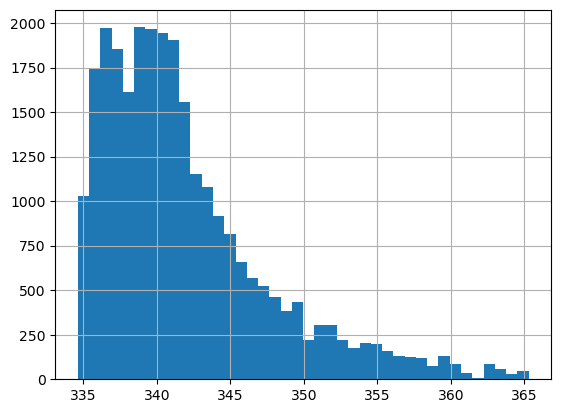

In [101]:
data["Tsupply"].hist(bins=40)

In [102]:
trainfull = data[["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]]

In [103]:
target = data["Class"]

In [110]:
target.unique()

array(['Lean', 'Nominal', 'ExcessAir', 'Fouling', 'Scaling'], dtype=object)

In [105]:
scaler = MinMaxScaler()
scaler = scaler.fit(trainfull)
trainfull[:] = scaler.transform(trainfull)

/tmp/ipykernel_49464/2382886324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainfull[:] = scaler.transform(trainfull)
/tmp/ipykernel_49464/2382886324.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         ... 0.         0.66666667 1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  trainfull[:] = scaler.transform(trainfull)
/tmp/ipykernel_49464/2382886324.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 1. 1. 1.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [106]:
target_df= pd.DataFrame(target)

In [107]:
target_df= pd.DataFrame(target)
target_df.shape

(27280, 1)

In [108]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(target_df)
target_df_encoded = one_hot_encoder.transform(target_df)

In [46]:
X_train_full , X_test , y_train_full , y_test = train_test_split(trainfull, target_df_encoded, random_state=42)
X_test

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
8834,0.000000,0.0,0.000000,0.303325,0.157895
626,0.000000,0.3,0.000000,0.547623,0.105263
20841,0.333333,0.5,0.333333,0.369370,0.210526
5549,0.666667,0.5,0.666667,0.167167,0.736842
13218,0.666667,0.0,0.000000,0.259915,0.052632
...,...,...,...,...,...
18387,0.000000,0.3,1.000000,0.013697,0.947368
20472,0.333333,0.3,0.333333,0.201804,0.368421
410,0.000000,0.2,0.000000,0.803835,0.052632
21362,0.333333,0.7,1.000000,0.098287,0.842105


In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [48]:
X_train

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot
13857,0.666667,0.3,0.333333,0.164088,0.263158
14741,0.666667,0.7,0.666667,0.195707,0.736842
1458,0.000000,0.7,0.333333,0.358826,0.263158
26342,1.000000,1.0,0.666667,0.113807,0.736842
20425,0.333333,0.3,0.000000,0.198156,0.105263
...,...,...,...,...,...
1309,0.000000,0.6,0.333333,0.221730,0.526316
10237,0.000000,0.7,0.000000,0.212646,0.157895
26328,1.000000,1.0,0.666667,0.027928,0.631579
16467,1.000000,0.5,0.333333,0.146373,0.315789


In [49]:
target.head(10)

0         Lean
1      Nominal
2    ExcessAir
3    ExcessAir
4    ExcessAir
5    ExcessAir
6    ExcessAir
7    ExcessAir
8    ExcessAir
9    ExcessAir
Name: Class, dtype: object

In [50]:
target_df_encoded[:10]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [51]:
target.nunique()

5

In [52]:
n_features = X_train.shape[1]
n_classes = target.nunique()   # quantitative data

In [53]:
#kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(0.01), use_bias=False)
#model.add(tf.keras.layers.Dropout(0.20))


In [54]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(n_features,)))
model.add(tf.keras.layers.Dense(1024, activation="swish",))
model.add(tf.keras.layers.Dense(512, activation="swish",))
model.add(tf.keras.layers.Dense(256, activation="swish",))
model.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

In [55]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 663,557 (2.53 MB)

 Trainable params: 663,557 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002,weight_decay=1e-5)

In [57]:
model.compile(loss="categorical_crossentropy" #used because the target is number not hot encoded
,optimizer=optimizer,metrics=[tf.keras.metrics.Accuracy(),
                              tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall(),
                              tf.keras.metrics.F1Score()])

In [58]:
checkpoint_b = tf.keras.callbacks.ModelCheckpoint("../models/checkpoints_1.weights.h5",
save_weights_only=True, save_best_only = True)

early_stopping_b = tf.keras.callbacks.EarlyStopping(patience=35,
restore_best_weights=True)

In [59]:
R = model.fit(X_train,y_train,epochs=200, callbacks=[early_stopping_b,checkpoint_b],validation_data=(X_valid,y_valid))

Epoch 1/200


480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0000e+00 - f1_score: 0.2991 - loss: 1.1903 - precision_1: 0.5505 - recall_1: 0.2140 - val_accuracy: 0.0000e+00 - val_f1_score: 0.4832 - val_loss: 0.9042 - val_precision_1: 0.7026 - val_recall_1: 0.4489
Epoch 2/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - f1_score: 0.4469 - loss: 0.9049 - precision_1: 0.6585 - recall_1: 0.4991 - val_accuracy: 0.0000e+00 - val_f1_score: 0.5218 - val_loss: 0.8022 - val_precision_1: 0.7209 - val_recall_1: 0.5296
Epoch 3/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - f1_score: 0.4885 - loss: 0.8229 - precision_1: 0.6965 - recall_1: 0.5500 - val_accuracy: 0.0000e+00 - val_f1_score: 0.4976 - val_loss: 0.7705 - val_precision_1: 0.7212 - val_recall_1: 0.5453
Epoch 4/200
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 2.9435e-05 - f1_score: 0.5000 - loss: 0.7932 - precision_1: 0.7108 - recall_1: 0.5697 - val_accuracy: 6.6471e-04 - val_f1_score: 0.5003 - va

In [60]:
checkpoint_b.best

0.38869747519493103

In [61]:
model.evaluate(X_test,y_test)

  1/214 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1000 - f1_score: 0.7831 - loss: 0.3842 - precision_1: 0.7188 - recall_1: 0.7188

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1498 - f1_score: 0.7673 - loss: 0.3872 - precision_1: 0.7810 - recall_1: 0.7794


[0.3850187361240387,
 0.15319643914699554,
 0.7799647450447083,
 0.7785923480987549,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.9698535 , 0.73996174, 0.6233766 , 0.8276698 , 0.6649831 ],
       dtype=float32)>]

In [62]:
y_pred = model.predict(X_test)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [63]:
y_pred

array([[1.9791285e-29, 5.8123612e-01, 0.0000000e+00, 3.1403013e-29,
        4.1876388e-01],
       [8.5866982e-01, 1.4073069e-01, 1.8728641e-09, 1.7272049e-04,
        4.2679443e-04],
       [3.8468084e-04, 5.2837682e-01, 4.7441290e-18, 2.1394627e-08,
        4.7123849e-01],
       ...,
       [1.6785318e-11, 4.6037024e-01, 5.3675395e-01, 1.7169113e-03,
        1.1588411e-03],
       [1.3970516e-31, 6.1183983e-01, 0.0000000e+00, 2.6170950e-31,
        3.8816020e-01],
       [9.9471104e-01, 2.3729277e-03, 6.5438226e-13, 3.6358077e-05,
        2.8796415e-03]], dtype=float32)

In [64]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [65]:
y_pred_labels

array([1, 0, 1, ..., 2, 1, 0])

In [66]:
y_test

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [67]:
y_test_labels = np.argmax(y_test, axis=1)

In [68]:
y_test_labels

array([1, 0, 4, ..., 2, 4, 0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

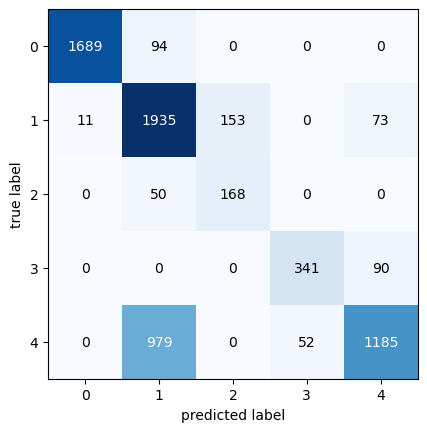

In [69]:
confusion_mat = confusion_matrix(y_test_labels,y_pred_labels)
plot_confusion_matrix(confusion_mat)

In [70]:
R.history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision_1', 'val_recall_1'])

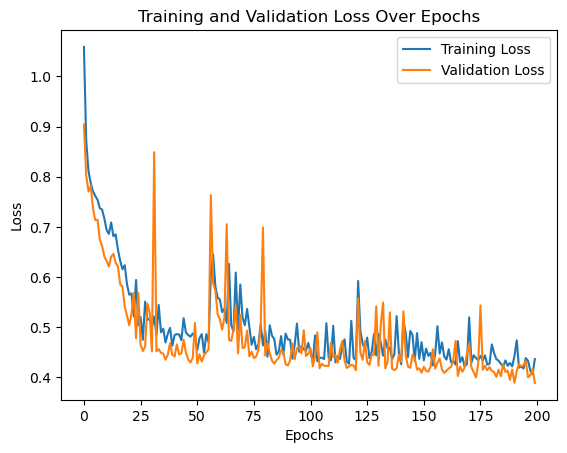

In [71]:
# Plot loss
plt.plot(R.history['loss'], label='Training Loss')
plt.plot(R.history['val_loss'], label='Validation Loss')



# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.show()

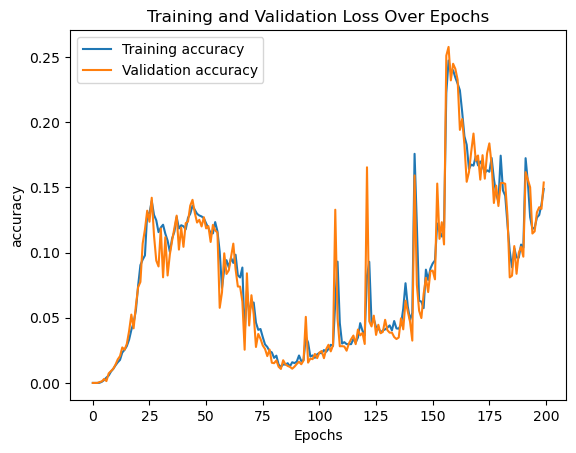

In [72]:
# Plot accuracy
plt.plot(R.history['accuracy'], label='Training accuracy')
plt.plot(R.history['val_accuracy'], label='Validation accuracy')


# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [73]:
model.save("../models/keras_model_1.keras")

In [74]:
tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Input(shape=(n_features,)))
model_2.add(tf.keras.layers.Dense(1024, activation="swish",))
model_2.add(tf.keras.layers.Dense(512, activation="swish",))
model_2.add(tf.keras.layers.Dense(256, activation="swish",))
model_2.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

In [75]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 663,557 (2.53 MB)

 Trainable params: 663,557 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
optimizer_2 = tf.keras.optimizers.Adam(learning_rate=0.001,weight_decay=1e-5)

In [77]:
model_2.compile(loss="categorical_crossentropy" #used because the target is number not hot encoded
,optimizer=optimizer_2,metrics=["accuracy", tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall(),
                              tf.keras.metrics.F1Score()])

In [78]:
checkpoint_b_2 = tf.keras.callbacks.ModelCheckpoint("../models/checkpoints_2.weights.h5",
save_weights_only=True, save_best_only = True)

early_stopping_b_2 = tf.keras.callbacks.EarlyStopping(patience=35,
restore_best_weights=True)

In [79]:
R_2 = model_2.fit(X_train,y_train,epochs=500, callbacks=[early_stopping_b_2,checkpoint_b_2],validation_data=(X_valid,y_valid))

Epoch 1/500


480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4280 - f1_score: 0.2885 - loss: 1.2277 - precision_2: 0.5225 - recall_2: 0.1621 - val_accuracy: 0.5828 - val_f1_score: 0.4167 - val_loss: 0.9110 - val_precision_2: 0.6650 - val_recall_2: 0.4456
Epoch 2/500
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5940 - f1_score: 0.4556 - loss: 0.9068 - precision_2: 0.6594 - recall_2: 0.4995 - val_accuracy: 0.6326 - val_f1_score: 0.4835 - val_loss: 0.7969 - val_precision_2: 0.7216 - val_recall_2: 0.5517
Epoch 3/500
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6290 - f1_score: 0.4917 - loss: 0.8210 - precision_2: 0.7020 - recall_2: 0.5591 - val_accuracy: 0.6565 - val_f1_score: 0.5126 - val_loss: 0.7646 - val_precision_2: 0.7253 - val_recall_2: 0.5689
Epoch 4/500
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6434 - f1_score: 0.5037 - loss: 0.7823 - precision_2: 0.7169 - recall_2: 0.5733 - val_accuracy: 0.6594 - val_f1_score: 0.5324 - val_loss: 0.7571 - val_precision_2

In [80]:
checkpoint_b_2.best

0.3933466374874115

In [81]:
model_2.evaluate(X_test,y_test)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - f1_score: 0.7751 - loss: 0.3977 - precision_2: 0.7725 - recall_2: 0.7693


[0.39450398087501526,
 0.7736070156097412,
 0.7738234996795654,
 0.7715542316436768,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.94786173, 0.6981289 , 0.6199021 , 0.8922716 , 0.71309185],
       dtype=float32)>]

In [82]:
y_pred_2 = model_2.predict(X_test)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [83]:
y_pred

array([[1.9791285e-29, 5.8123612e-01, 0.0000000e+00, 3.1403013e-29,
        4.1876388e-01],
       [8.5866982e-01, 1.4073069e-01, 1.8728641e-09, 1.7272049e-04,
        4.2679443e-04],
       [3.8468084e-04, 5.2837682e-01, 4.7441290e-18, 2.1394627e-08,
        4.7123849e-01],
       ...,
       [1.6785318e-11, 4.6037024e-01, 5.3675395e-01, 1.7169113e-03,
        1.1588411e-03],
       [1.3970516e-31, 6.1183983e-01, 0.0000000e+00, 2.6170950e-31,
        3.8816020e-01],
       [9.9471104e-01, 2.3729277e-03, 6.5438226e-13, 3.6358077e-05,
        2.8796415e-03]], dtype=float32)

In [84]:
y_pred_labels_2 = np.argmax(y_pred_2, axis=1)

In [85]:
y_pred_labels_2

array([4, 0, 1, ..., 2, 1, 0])

In [86]:
y_test

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [87]:
y_test_labels = np.argmax(y_test, axis=1)

In [88]:
y_test_labels

array([1, 0, 4, ..., 2, 4, 0])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

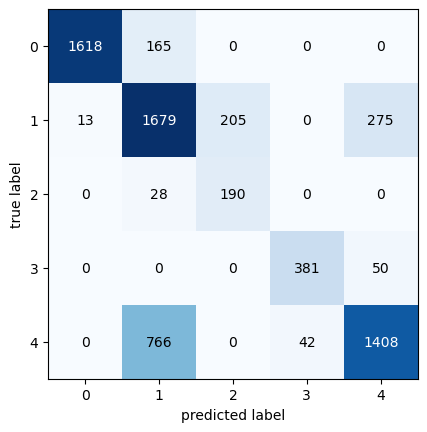

In [89]:
confusion_mat = confusion_matrix(y_test_labels,y_pred_labels_2)
plot_confusion_matrix(confusion_mat)

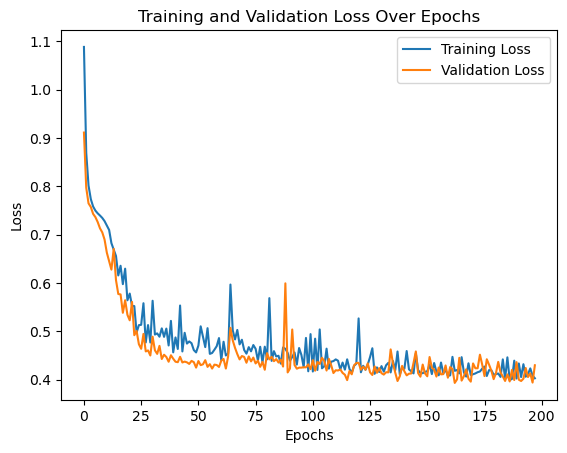

In [90]:
# Plot loss
plt.plot(R_2.history['loss'], label='Training Loss')
plt.plot(R_2.history['val_loss'], label='Validation Loss')



# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.show()

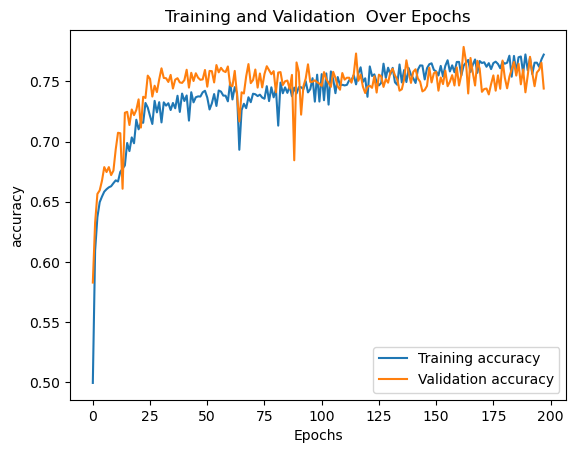

In [91]:
# Plot accuracy
plt.plot(R_2.history['accuracy'], label='Training accuracy')
plt.plot(R_2.history['val_accuracy'], label='Validation accuracy')


# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation  Over Epochs')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [92]:
model_2.save("../models/keras_model_2.keras")